# Analysis Report: Analysing mobile usage

**Author**: PUNEETH G S  
**Date**: 4 / 2 /2025

# Analysis of E - commerce Data set 
### source : kaggle 


# Objective
The primary objective of this analysis is to segment customers based on their purchasing behaviors and demographic attributes using K-Means clustering. By identifying distinct customer groups, we aim to:

- Understand customer behavior patterns to tailor marketing strategies and improve customer engagement.
  
- Identify high-value customer segments to optimize resource allocation and target premium services or products.
  
- Detect outliers in the dataset to ensure data quality and gain insights into unusual purchasing behaviors that might indicate potential market opportunities or data issues.
  
- Enhance business decision-making by providing a data-driven approach to customer segmentation, enabling personalized marketing campaigns, and optimizing product offerings.
  
- This analysis will provide actionable insights, allowing the business to better align products and services with customer needs, ultimately driving growth and customer satisfaction

# Data Descriptions

Here’s a structured overview of the attributes related to user data:

| **Attribute Name**             | **Description**                                                                                                                                          |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|
| **User ID**                    | A unique identifier assigned to each user. It does not contribute to clustering but helps track individual users.                                        |
| **Age**                        | The age of the user in years, which may indicate different user behavior patterns.                                                                       |
| **Gender**                     | The gender of the user (e.g., Male, Female, Other). This may impact phone usage patterns.                                                               |
| **Location**                   | The geographical location (city, state, or country) of the user, which may influence spending habits and preferences.                                    |
| **Phone Brand**                | The brand of the smartphone the user owns (e.g., Apple, Samsung, Xiaomi). This can be an indicator of brand loyalty or spending capacity.                 |
| **OS (Operating System)**      | The mobile operating system used (e.g., Android, iOS). Can be useful for analyzing platform-specific behavior.                                          |
| **Screen Time (hrs/day)**      | The average number of hours per day the user spends on their phone. Higher screen time may indicate heavy phone usage.                                   |
| **Data Usage (GB/month)**      | The total amount of mobile data consumed per month, measured in gigabytes. This helps in understanding internet dependency.                               |
| **Calls Duration (mins/day)**   | The average number of minutes spent on phone calls per day. Helps identify users who rely more on voice communication.                                   |
| **Number of Apps Installed**    | The total number of applications installed on the user’s phone. Can indicate user engagement and digital lifestyle.                                       |
| **Social Media Time (hrs/day)** | The average time spent on social media platforms daily. Helps in identifying social media engagement levels.                                             |
| **E-commerce Spend (INR/month)**| The amount of money spent on online shopping per month in Indian Rupees (INR). Helps segment users based on spending habits.                             |
| **Streaming Time (hrs/day)**    | The time spent watching videos on platforms like YouTube, Netflix, or other streaming services. Indicates content consumption preferences.                 |
| **Gaming Time (hrs/day)**       | The time spent playing mobile games per day. Helps in understanding gaming habits.                                                                        |
| **Monthly Recharge Cost (INR)** | The amount spent on mobile recharges or postpaid bills per month in INR. Can indicate spending capacity and telecom dependency.                          |
| **Primary Use**                 | The main purpose for which the user utilizes their phone (e.g., Work, Entertainment, Social Media, Gaming). Helps classify users into different categories based on their priorities. |

This table summarizes the key attributes and their significance in understanding user behavior and preferences.

# Methodalogy

1. Load and explore the dataset.
2. explore data
3. Perform data cleaning and preprocessing.
4. Analyze and visualize key metrics.
5. Draw conclusions and provide recommendations.


# Load data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
# reading the file 

data = pd.read_csv(r"C:\Users\punee\Downloads\phone usage\phone_usage_india.csv")

In [3]:
# basic analysis 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

In [4]:
data.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [7]:
data.describe()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [8]:
data.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [9]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')

In [10]:
## feature engineering 
def Age_group_cal(age):
    if age<=18:
        return "<18"
    elif age >18 and age <25:
        return "18-25"
    elif age >25 and age < 30:
        return "25-30"
    elif age >30 and age < 40:
        return "30-40"
    elif age >40 and age < 45:
        return "40-45"
    elif age > 45 and age < 50:
        return "45-50"
    elif age >50 and age < 55:
        return "50-55"
    else:
        return "55 above"

        
        


In [11]:
data['AgeGroups'] = data['Age'].apply(Age_group_cal)

In [12]:
data

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,30-40
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,30-40
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,<18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17681,U17682,27,Other,Mumbai,Apple,iOS,7.2,36.6,90.4,81,5.1,4007,3.8,3.3,1380,Entertainment,25-30
17682,U17683,40,Female,Chennai,Oppo,iOS,9.5,12.9,243.0,166,4.3,8550,3.4,0.7,222,Education,55 above
17683,U17684,34,Female,Ahmedabad,Realme,Android,1.1,48.9,74.7,70,5.3,5516,0.7,4.0,1612,Entertainment,30-40
17684,U17685,22,Male,Hyderabad,Vivo,Android,8.8,25.6,105.6,96,2.4,3614,6.6,0.8,1528,Work,18-25


# Demographic Analysis

# 1 What is the average age of users, and how does it vary by gender and location?

In [15]:
data.head(2)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above


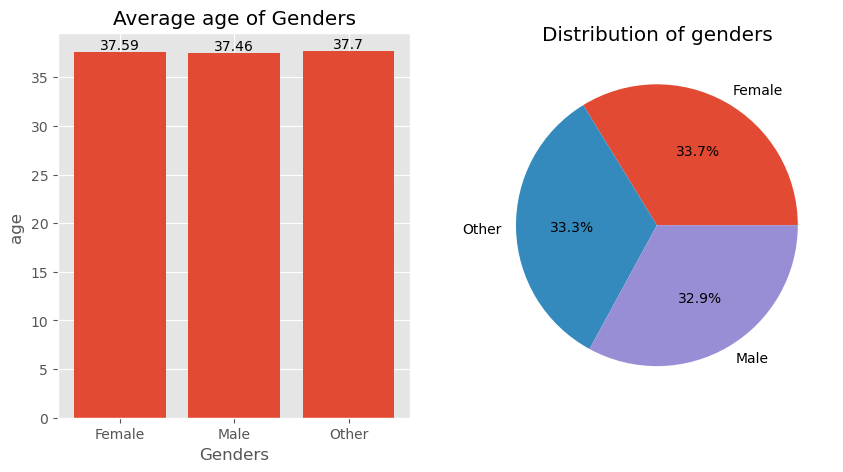

In [16]:
avg_age_gender = data.groupby(["Gender"])['Age'].mean().reset_index()
count = avg_age_gender['Age'].round(2)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
bar = plt.bar(x=avg_age_gender['Gender'] , height=avg_age_gender['Age'])
plt.bar_label(bar , count)
plt.xlabel("Genders")
plt.ylabel("age ")
plt.title("Average age of Genders")


plt.subplot(1,2,2)

data['Gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")
plt.title("Distribution of genders")

plt.show()

# insights 
- average age of 3 gender categoeris is 37 
- thes over 33.7% are female users , 33.3 are other gender user and 
- 32.9 are male users in dataset

# 2  How does the primary use of smartphones vary by age group?

In [19]:
data.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,30-40
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,30-40
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,<18


In [20]:
# creating a age group 
age_distri = data.groupby(['Age']).agg(count=('Age', 'count')).reset_index()

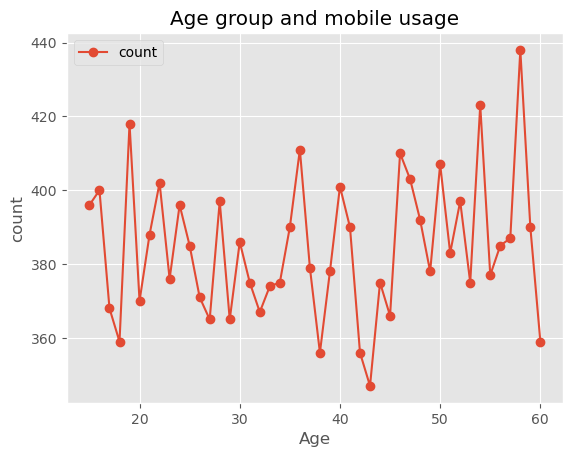

In [21]:
age_distri.plot.line(x = 'Age' ,y= 'count' , marker="o")
plt.title("Age group and mobile usage")
plt.ylabel("count")
plt.show()

# insights 
- more user from age group of 50 - 60 
- average uers 384 from all the age group
- less the n 360 in age of 42 and 18
- less users from 29 to 35


# Device Preferences

## 3. Which phone brands are most popular among different locations?


In [26]:
data.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,30-40
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,30-40
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,<18


In [27]:
# based on diffrent locations 

top_10_brands = data[['Location' ,"Phone Brand"]].value_counts().reset_index().head(10)

In [28]:
top_10_brands

,Location,Phone Brand,count
0,Kolkata,Xiaomi,213
1,Chennai,Samsung,211
2,Pune,Nokia,210
3,Jaipur,Motorola,201
4,Kolkata,OnePlus,200
5,Jaipur,Vivo,197
6,Ahmedabad,Google Pixel,196
7,Bangalore,Oppo,196
8,Lucknow,Nokia,195
9,Kolkata,Vivo,195


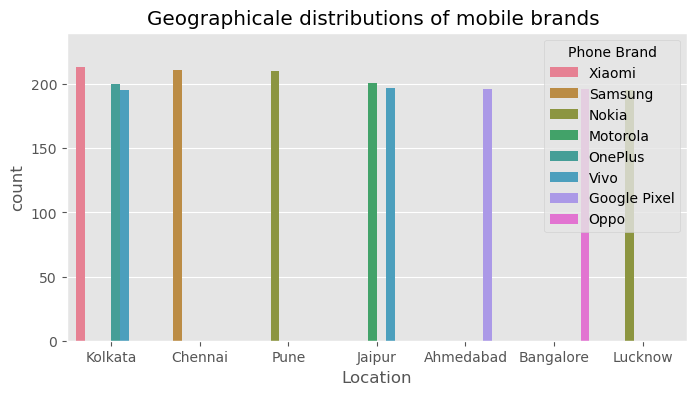

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(data=top_10_brands , x="Location" , y="count" , hue="Phone Brand")
plt.title("Geographicale distributions of mobile brands ")
plt.ylim([0,240])
plt.show()

# location wise barnds popularity
- kolkata - Xiomi 200+ , Motorola 200  , vivo 190 users 
- chennai - samsung 220 + users 
- pune - nokia 200 + users 
- Jaipur - Motorola 200 , vivo 195 users 
- Bangalore - oppo 195 + users 
- Lacknow - nokia 200+


In [31]:
data.head(2)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above


# How does the preferred operating system (OS) correlate with other factors like gender, location, or age?

In [33]:
# gender 

gender_os = data[['Gender' , "OS"]].value_counts().reset_index().sort_values(by="count" , ascending=True)


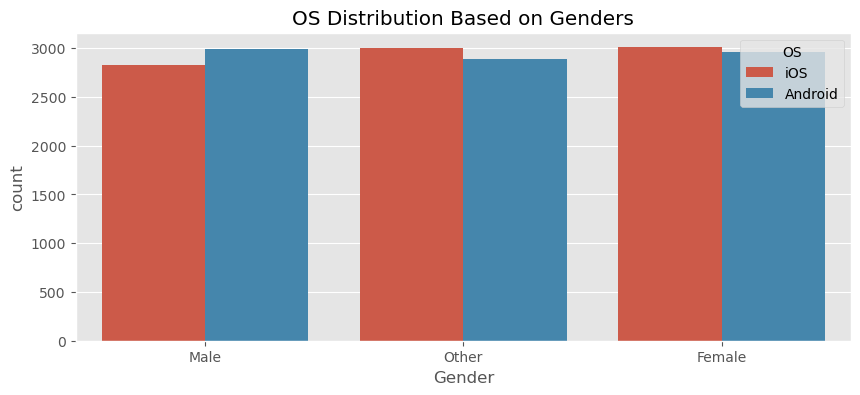

In [34]:
plt.figure(figsize=(10, 4))
bars = sns.barplot(data=gender_os, x="Gender", y="count", hue="OS")
plt.title("OS Distribution Based on Genders")
plt.show()




### User Distribution by Gender and OS

- **Male Users**
  - Android: 3000
  - iOS: 2800

- **Other Gender Users**
  - iOS: 3000
  - Android: 2800

- **Female Users**
  - iOS: 3000
  - Android: 2900


In [36]:
data.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,30-40
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,30-40
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,<18


In [37]:
# male distribution 

male_os=data[data['Gender']=="Male"]["OS"].value_counts().reset_index()
female_os = data[data['Gender']=="Female"]['OS'].value_counts().reset_index()
other_os = data[data['Gender']=="Other"]['OS'].value_counts().reset_index()

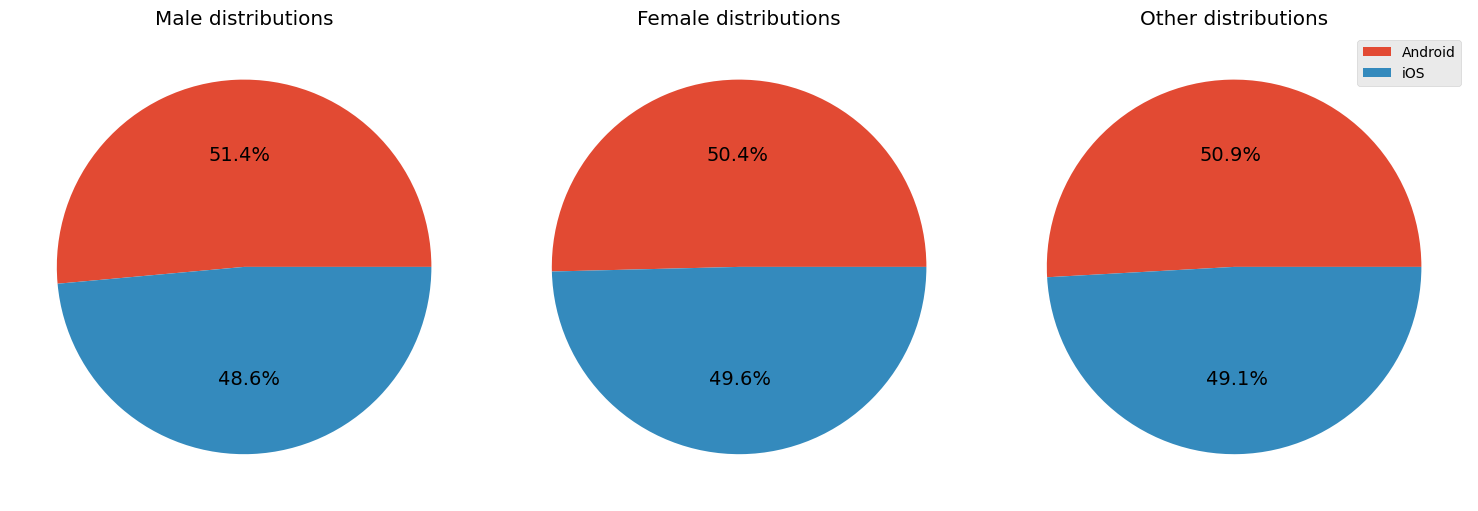

In [38]:
#ploting the data 

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# male users 
ax[0].pie(male_os['count'] , autopct="%1.1f%%" ,textprops={'fontsize': 14})
ax[0].set_title("Male distributions")

# female users 

ax[1].pie(female_os['count'] , autopct="%1.1f%%" ,textprops={'fontsize': 14})
ax[1].set_title("Female distributions")

# others users 

ax[2].pie(other_os['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[2].set_title("Other distributions")

plt.tight_layout()
plt.legend(male_os['OS'])
plt.show()



### OS Distribution by Gender

- **Male**:
  - **Android**: 51.4%
  - **iOS**: 48.6%

- **Female**:
  - **Android**: 50.4%
  - **iOS**: 49.6%

- **Others**:
  - **An  - **IOS**: 49.1%rther modifications!

In [40]:
# Location wise analysis of OS 

In [41]:
data['Location'].unique()

array(['Mumbai', 'Delhi', 'Ahmedabad', 'Pune', 'Jaipur', 'Lucknow',
       'Kolkata', 'Bangalore', 'Chennai', 'Hyderabad'], dtype=object)

In [42]:


mumbai_users=data[data['Location']=="Mumbai"]['OS'].value_counts().reset_index()

delhi_users=data[data['Location']=="Delhi"]['OS'].value_counts().reset_index()

ahmedabad_users=data[data['Location']=="Ahmedabad"]['OS'].value_counts().reset_index()

pune_users=data[data['Location']=="Pune"]['OS'].value_counts().reset_index()

jaipur_users=data[data['Location']=="Jaipur"]['OS'].value_counts().reset_index()

lacknow_users=data[data['Location']=="Lucknow"]['OS'].value_counts().reset_index()

kolkata_users=data[data['Location']=="Kolkata"]['OS'].value_counts().reset_index()

bangalore_users=data[data['Location']=="Bangalore"]['OS'].value_counts().reset_index()

chennai_users=data[data['Location']=="Chennai"]['OS'].value_counts().reset_index()

hyderbad_users=data[data['Location']=="Hyderabad"]['OS'].value_counts().reset_index()


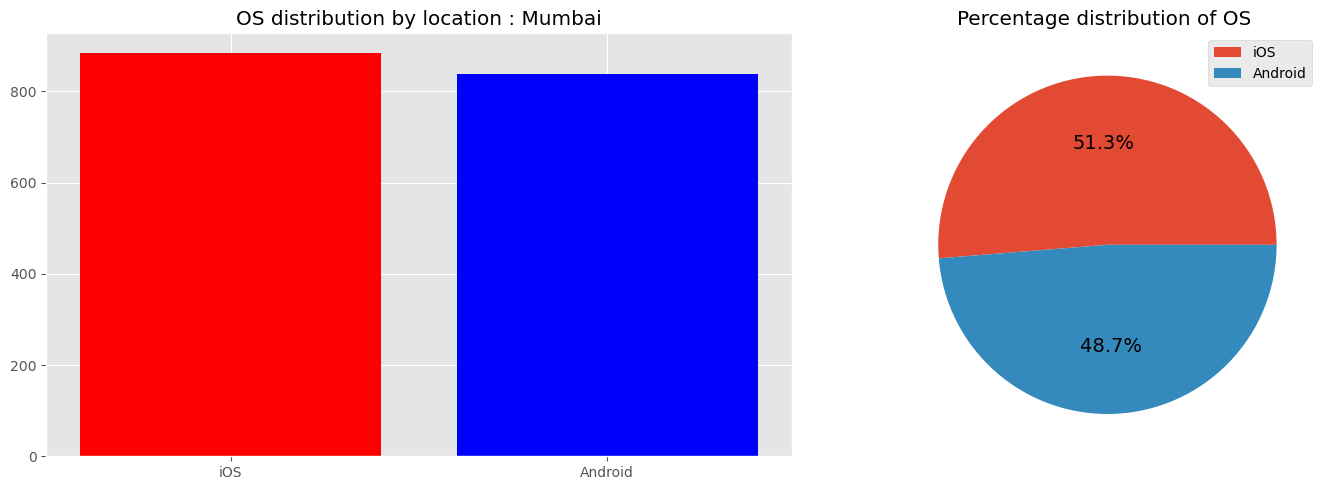

In [43]:
# ploting the data

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of mumbai users 
ax[0].bar(mumbai_users['OS'] , mumbai_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Mumbai")

#piechart
ax[1].pie(mumbai_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(mumbai_users['OS'])
plt.show()



### User Distribution in Mumbai

- **Total Users**:
  - **iOS Users**: 883
  - **Android Users**: 839


- **Percentage of Users**:
  - **iOS Users**: 51.3%
  - **Android Users**: 48.7%



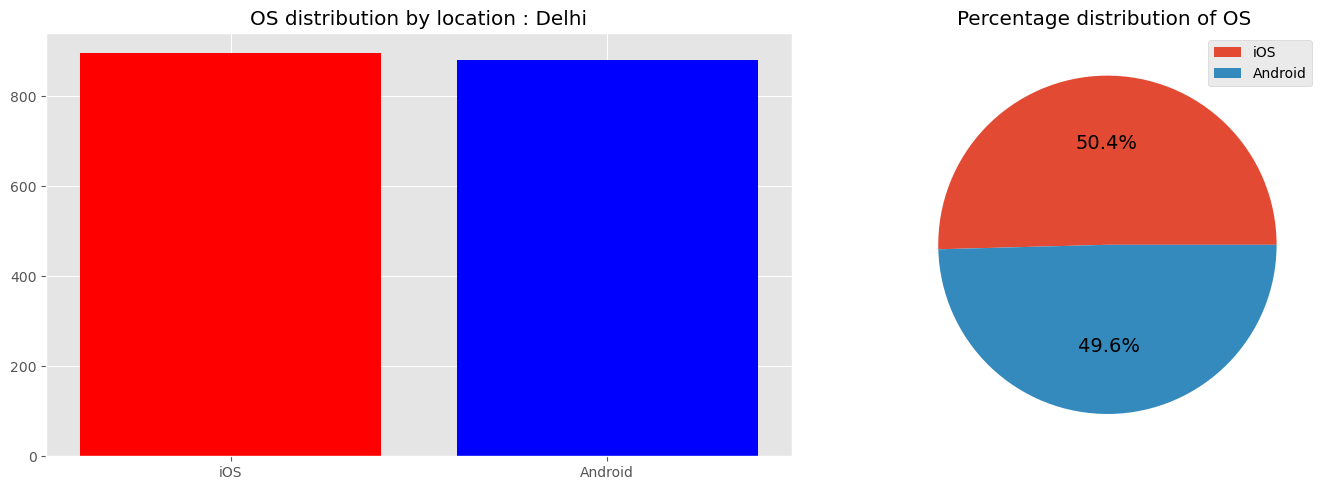

In [45]:
# delhi users data 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of Delhi users 
ax[0].bar(delhi_users['OS'] ,delhi_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Delhi")

#piechart
ax[1].pie(delhi_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(delhi_users['OS'])
plt.show()


### User Distribution in Delhi

- **Total Users**: 1,775
  - **iOS Users**: 895
  - **Android Users**: 880

### Percentage Distribution

- **iOS Users**: 
  - 50.4%

- **Android Users**: 
  - 49.6%


This shows a nearly equal distribution between iOS and Android users in Delhi.

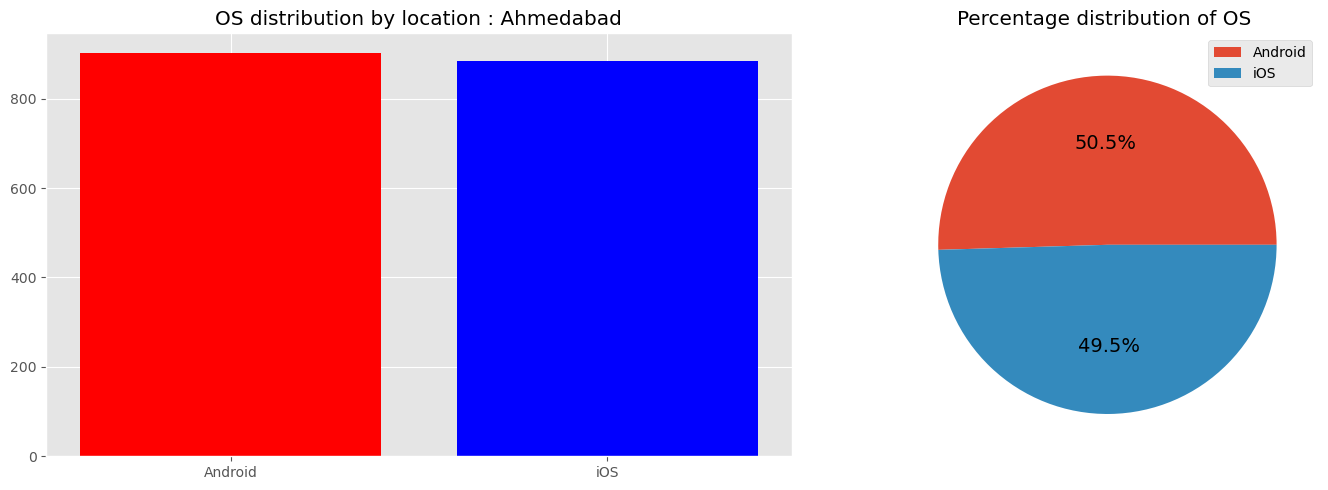

In [48]:
# ahmadabad 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of Ahmadabad users 
ax[0].bar(ahmedabad_users['OS'] ,ahmedabad_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Ahmedabad")

#piechart
ax[1].pie(ahmedabad_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(ahmedabad_users['OS'])
plt.show()


### User Distribution in Ahmedabad

- **Total Users**: 1,785
  - **iOS Users**: 901
  - **Android Users**: 884

### Percentage Distribution

- **iOS Users**: 49.5%
- **Android Users**: 50.5%

This indicates a slight majority of Android users compared to iOS users in Ahmedabad.

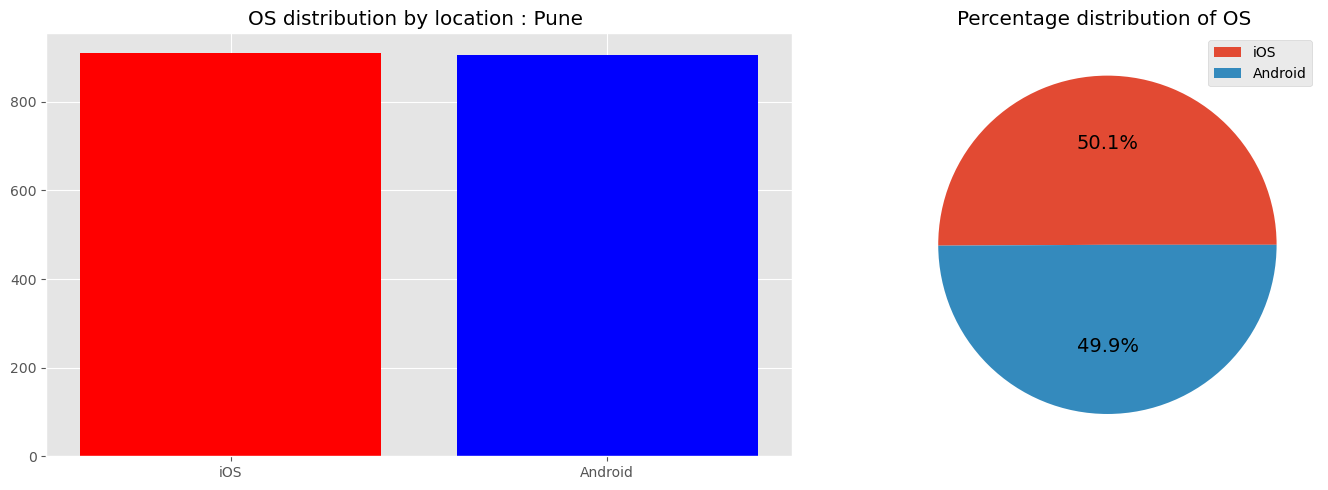

In [50]:
# pune 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of Pune users 
ax[0].bar(pune_users['OS'] ,pune_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Pune ")

#piechart
ax[1].pie(pune_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(pune_users['OS'])
plt.show()




### User Distribution in Pune

- **Total Users**: 1,815
  - **iOS Users**: 909
  - **Android Users**: 906

### Percentage Distribution

- **iOS Users**: 50.1%
- **Android Users**: 49.9%

This reflects a slight majority of iOS users compared to Android users in jaipur.

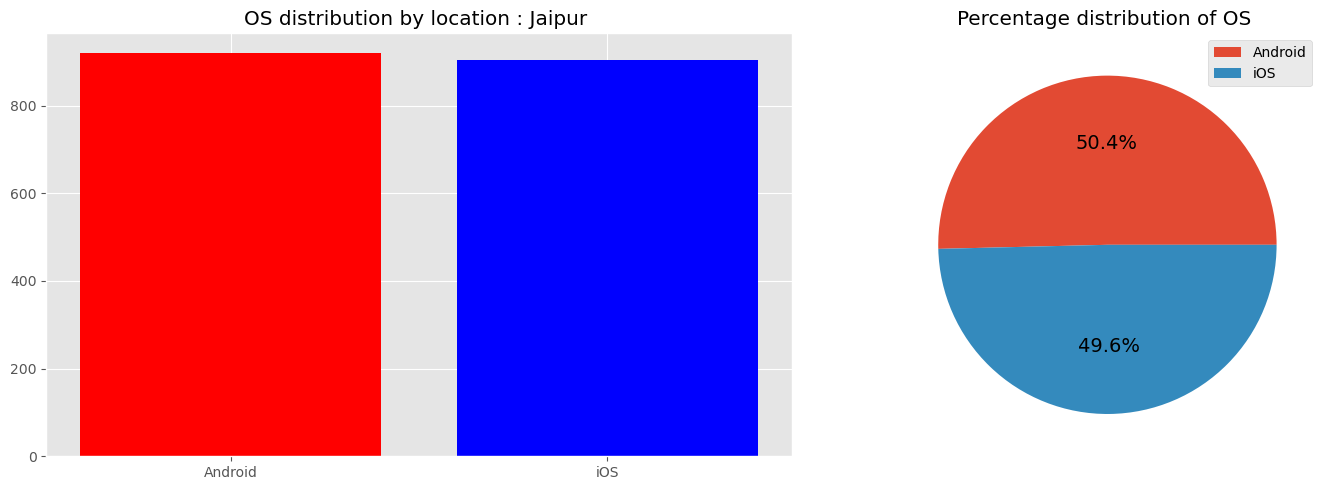

In [52]:
# jaipur

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of jaipur users 
ax[0].bar(jaipur_users['OS'] ,jaipur_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Jaipur ")

#piechart
ax[1].pie(jaipur_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(jaipur_users['OS'])
plt.show()




### User Distribution Lacknow

- **Total Users**: 1,824
  - **Android Users**: 919
  - **iOS Users**: 905

### Percentage Distribution


- **Android Users**: 50.4%
- **iOS Users**: 49.6%

This indicates a slight majority of Android users compared to iOS users.



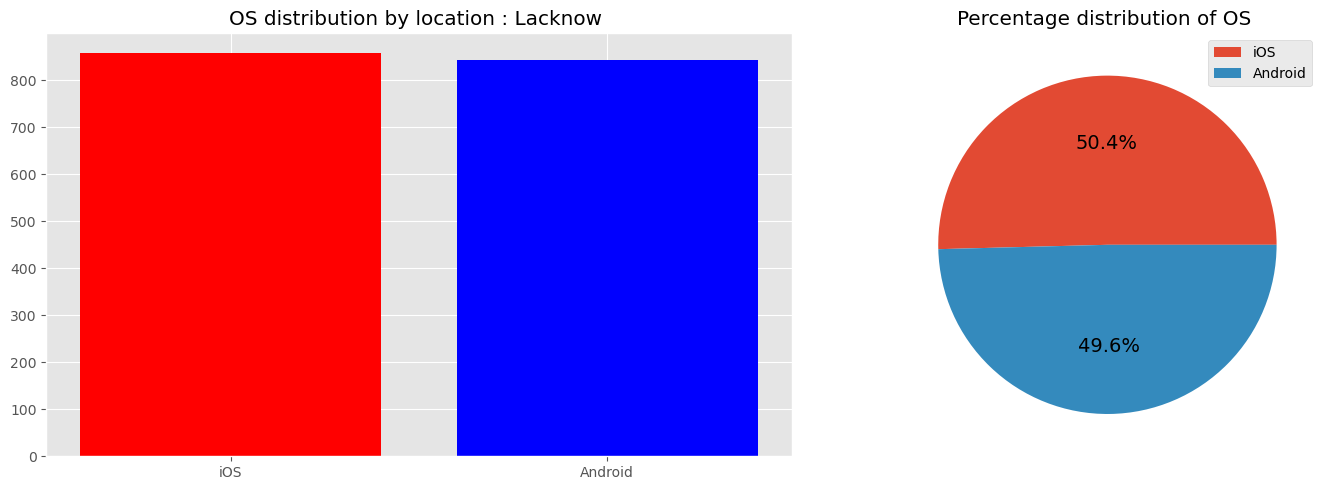

In [54]:
# lacknow 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of Lacknow users 
ax[0].bar(lacknow_users['OS'] ,lacknow_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Lacknow ")

#piechart
ax[1].pie(lacknow_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(lacknow_users['OS'])
plt.show()


### User Distribution in Lucknow

- **Total Users**: 1,700
  - **iOS Users**: 857
  - **Android Users**: 843

### Percentage Distribution

- **iOS Users**: 50.4%
- **Android Users**: 49.6%

This shows a slight majority of iOS users compared to Android users in Lucknow.

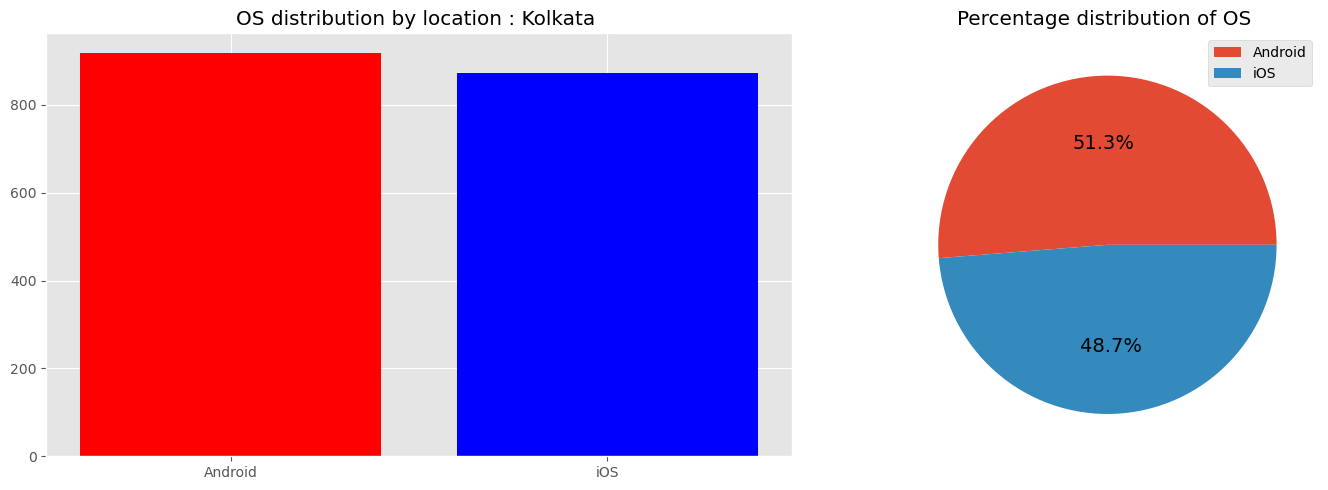

In [56]:
# kolkata
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of kolkatta users 
ax[0].bar(kolkata_users['OS'] ,kolkata_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Kolkata ")

#piechart
ax[1].pie(kolkata_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(kolkata_users['OS'])
plt.show()

Here’s the summary for the user distribution in Kolkata:

### User Distribution in Kolkata

- **Total Users**: 1,789
  - **Android Users**: 917
  - **iOS Users**: 872

### Percentage Distribution

- **Android Users**: 51.3%
- **iOS Users**: 48.7%

This indicates a slight majority of Android users compared to iOS users in Kolkata.


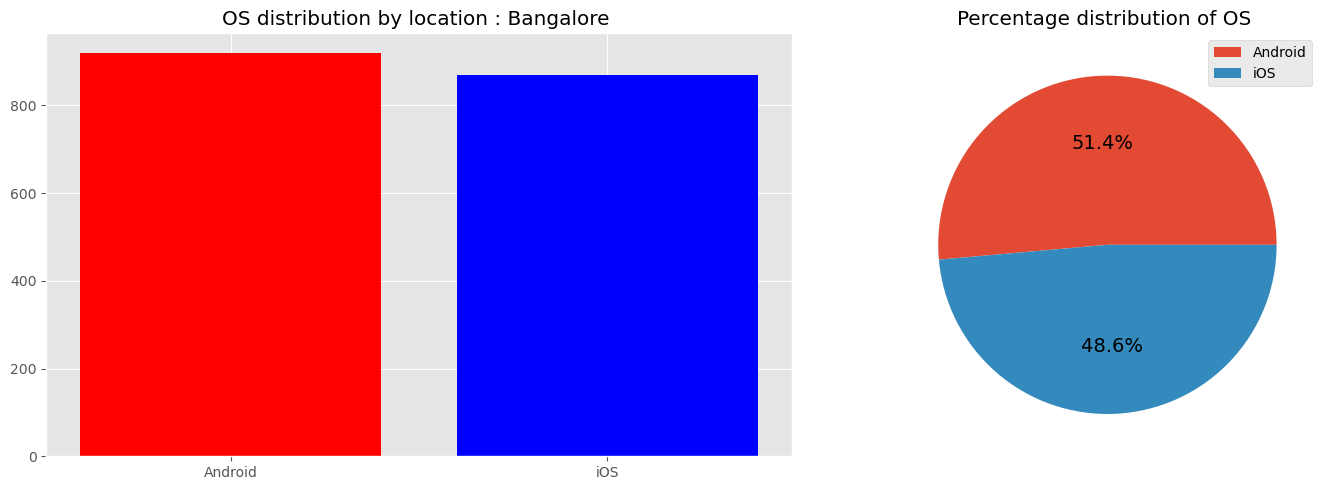

In [58]:
#Bangalore 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of kolkatta users 
ax[0].bar(bangalore_users['OS'] ,bangalore_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Bangalore ")

#piechart
ax[1].pie(bangalore_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(bangalore_users['OS'])
plt.show()




### User Distribution in Bangalore

- **Total Users**: 1,784
  - **Android Users**: 918
  - **iOS Users**: 868

### Percentage Distribution

- **Android Users**: 51.4%
- **iOS Users**: 48.6%

This shows a slight majority of Android users compared to iOS users in Bangalore.

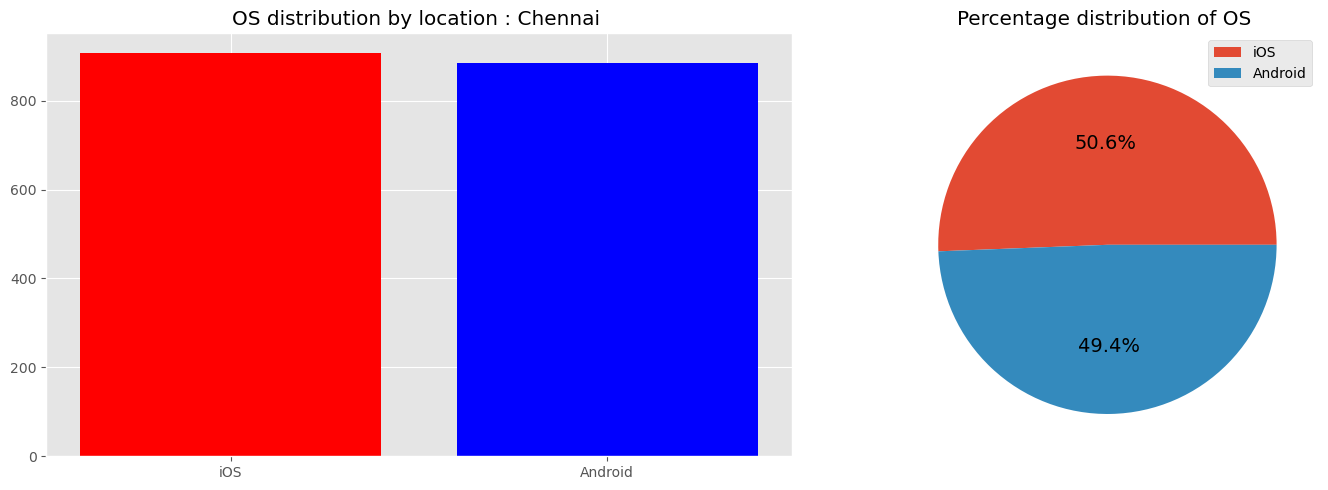

In [60]:
# chennai
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of kolkatta users 
ax[0].bar(chennai_users['OS'] ,chennai_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Chennai ")

#piechart
ax[1].pie(chennai_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(chennai_users['OS'])
plt.show()





### User Distribution in Chennai

- **Total Users**: 1,790
  - **iOS Users**: 906
  - **Android Users**: 884

### Percentage Distribution

- **iOS Users**: 50.6%
- **Android Users**: 49.4%

This indicates a slight majority of iOS users compared to Android users in Chennai.

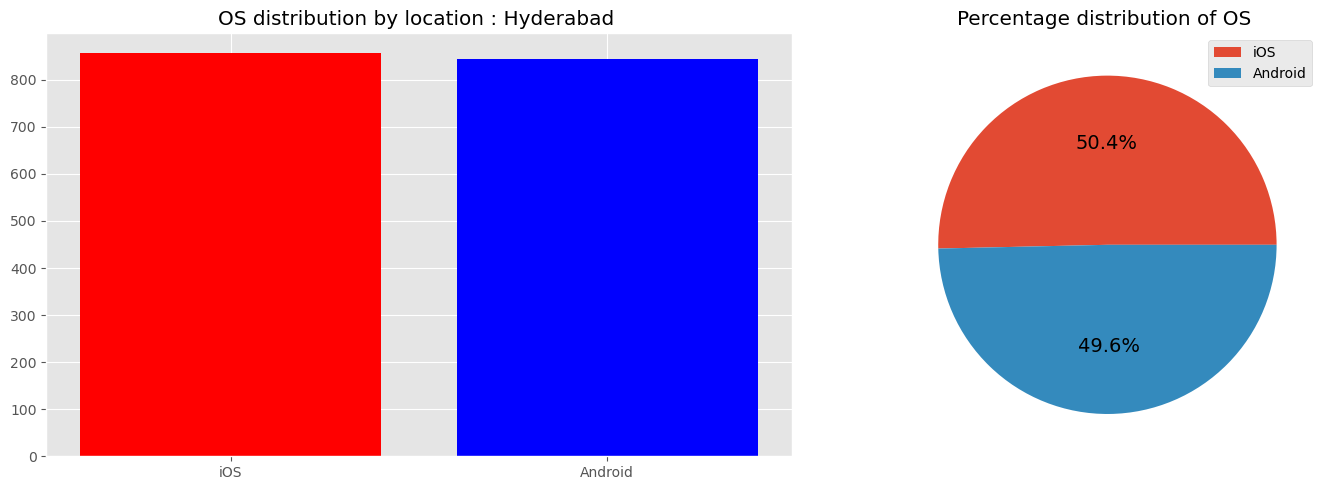

In [62]:
# hydrabad 
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# bar graph of kolkatta users 
ax[0].bar(hyderbad_users['OS'] ,hyderbad_users['count'] , color=['red' , 'blue'])
ax[0].set_title("OS distribution by location : Hyderabad ")

#piechart
ax[1].pie(hyderbad_users['count'] , autopct="%1.1f%%" , textprops={'fontsize': 14})
ax[1].set_title("Percentage distribution of OS ")

plt.tight_layout()
plt.legend(hyderbad_users['OS'])
plt.show()




### User Distribution in Hyderabad

- **Total Users**: 1,700
  - **iOS Users**: 856
  - **Android Users**: 844

### Percentage Distribution

- **iOS Users**: 50.4%
- **Android Users**: 49.6%

This shows a slight majority of iOS users compared to Android users in Hyderabad.

# AGE 

<Axes: >

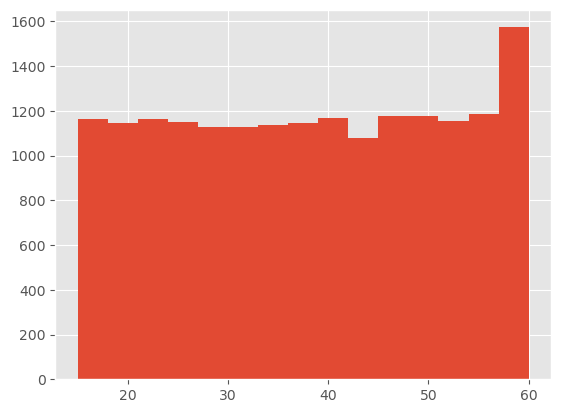

In [65]:
data['Age'].hist(bins=15)

<Axes: ylabel='Density'>

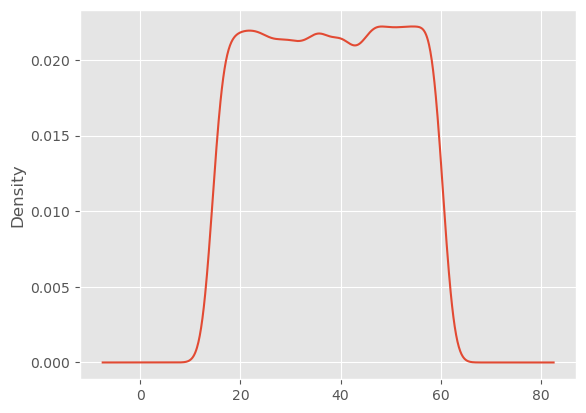

In [66]:
data['Age'].plot.kde()

### majority users are from 20 to 60 age gerop

# Usage Patterns

## What is the average screen time per day, and how does it vary with age, gender, and phone brand?

In [70]:
data.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,30-40
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,30-40
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,<18


In [71]:
phone_brand_usage =data.groupby(['Phone Brand'])[['Age' ,'Screen Time (hrs/day)']].mean().reset_index()

In [72]:
phone_brand_usage['Screen Time (hrs/day)']=phone_brand_usage['Screen Time (hrs/day)'].round(1)

In [73]:
phone_brand_usage['Age'] = phone_brand_usage['Age'].round(0)

In [74]:
phone_brand_usage['Age'].astype="int"

In [75]:
phone_brand_usage

,Phone Brand,Age,Screen Time (hrs/day)
0,Apple,38.0,6.5
1,Google Pixel,38.0,6.4
2,Motorola,38.0,6.6
3,Nokia,37.0,6.6
4,OnePlus,38.0,6.5
5,Oppo,37.0,6.4
6,Realme,38.0,6.6
7,Samsung,38.0,6.6
8,Vivo,37.0,6.5
9,Xiaomi,37.0,6.6


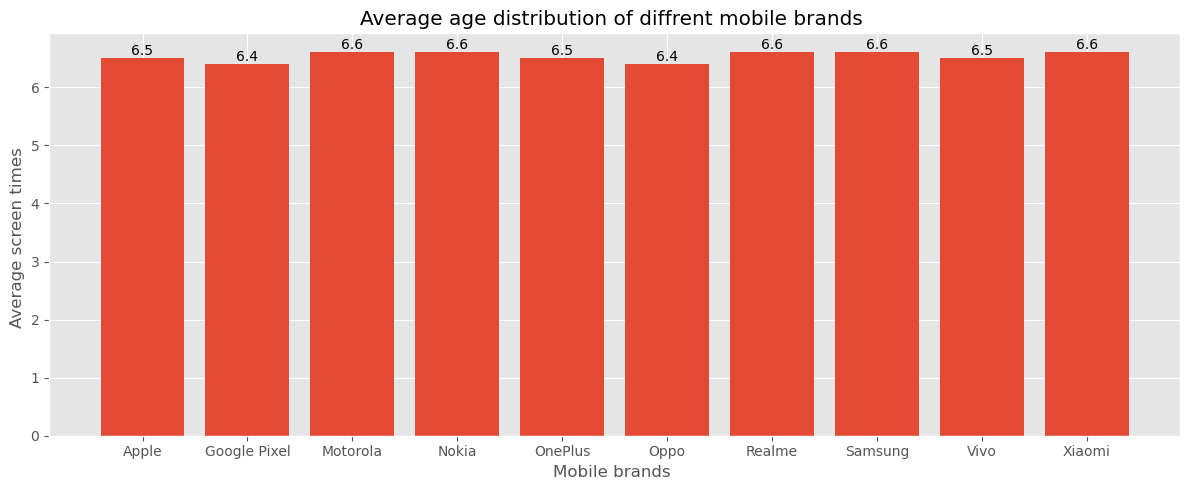

In [76]:
#plot the bar  graph 

plt.figure(figsize=(12,5))
count = phone_brand_usage['Screen Time (hrs/day)']
bar=plt.bar(phone_brand_usage['Phone Brand'] , phone_brand_usage['Screen Time (hrs/day)'])
plt.title("Average age distribution of diffrent mobile brands ")
plt.bar_label(bar , count)
plt.xlabel("Mobile brands ")
plt.ylabel("Average screen times ")
plt.tight_layout()
plt.show()

In [77]:
phone_brand_usage

,Phone Brand,Age,Screen Time (hrs/day)
0,Apple,38.0,6.5
1,Google Pixel,38.0,6.4
2,Motorola,38.0,6.6
3,Nokia,37.0,6.6
4,OnePlus,38.0,6.5
5,Oppo,37.0,6.4
6,Realme,38.0,6.6
7,Samsung,38.0,6.6
8,Vivo,37.0,6.5
9,Xiaomi,37.0,6.6


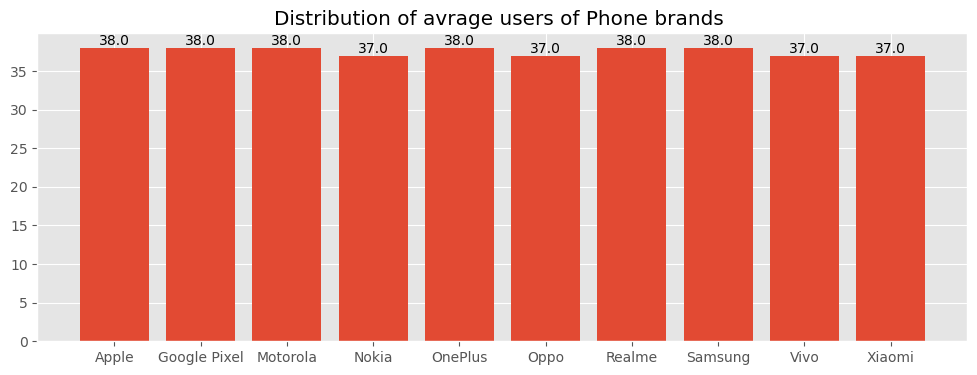

In [78]:
# average age distribution diffrent phone brands users 
plt.figure(figsize=(12,4))
count = phone_brand_usage['Age']
bar=plt.bar(phone_brand_usage['Phone Brand'] , phone_brand_usage['Age'])
plt.bar_label(bar , count)
plt.title("Distribution of avrage users of Phone brands ")
plt.show()

# Activity-Specific Insights

## How much time do users spend on gaming, and is it influenced by age or gender?

In [81]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use', 'AgeGroups'],
      dtype='object')

In [82]:
gaming_data =data[data['Primary Use']=="Gaming"]

In [83]:
gaming_analysis=gaming_data.groupby(["Gender" ,"Primary Use"]).agg(avg_age=("Age","mean"),
                                            avg_game_time=
                                            ("Gaming Time (hrs/day)","mean")).round(2).reset_index()

In [84]:
gaming_analysis

,Gender,Primary Use,avg_age,avg_game_time
0,Female,Gaming,37.95,2.48
1,Male,Gaming,37.52,2.57
2,Other,Gaming,38.05,2.45


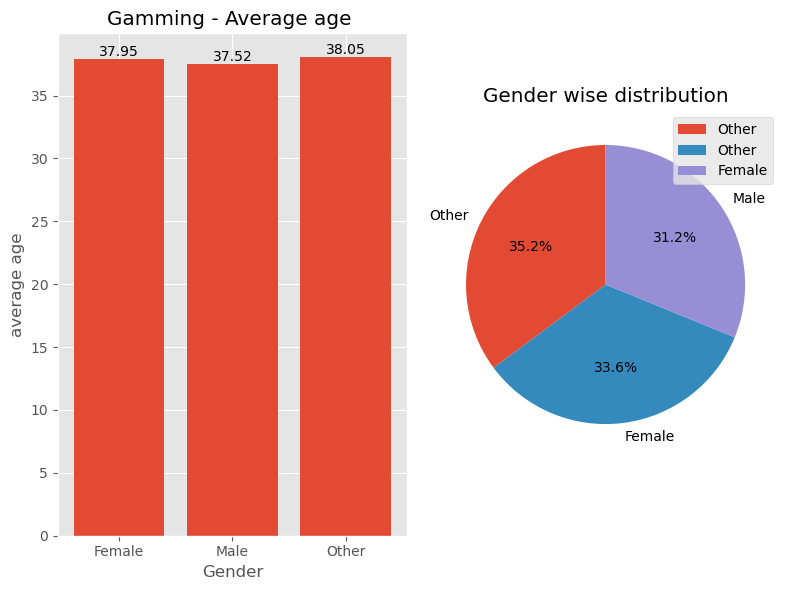

In [85]:
plt.figure(figsize=(12,4))
count = gaming_analysis['avg_age']
plt.subplot(1,2,1)
bar=plt.bar(gaming_analysis['Gender'] , gaming_analysis['avg_age'])
plt.bar_label(bar , count)
plt.title("Gamming - Average age ")
plt.xlabel("Gender")
plt.ylabel("average age")

plt.subplot(1, 2, 2) 
gaming_data['Gender'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(8, 6), startangle=90)
plt.ylabel("")
plt.title("Gender wise distribution")
plt.legend(gaming_data['Gender'])

plt.tight_layout()
plt.show()



## Insights on Gaming Purpose Usage

### Average Usage by Gender
- **Female**: **37.92 hrs/day**
- **Male**: **37.52 hrs/day**
- **Other**: **38.05 hrs/day**

### Percentage Distribution
- **Other Gender**: **35.2%**
- **Male Gender**: **33.6%**
- **Female Gender**: **31.2%**

### Summary
- The average gaming usage is relatively similar across genders, with "Other" having the highest average usage.
- The percentage distribution shows that "Other" genders have the largest representation, followed closely by males, while females have the lowest percentage in this context.


## What is the correlation between social media time and e-commerce spending?

In [88]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use', 'AgeGroups'],
      dtype='object')

In [89]:
data['Primary Use'].unique()

array(['Education', 'Gaming', 'Entertainment', 'Social Media', 'Work'],
      dtype=object)

In [90]:
scecom=data.groupby(["Gender"]).agg(avg_social_media_time =("Social Media Time (hrs/day)" , "mean"),
                            average_ecommerce_spend=("E-commerce Spend (INR/month)","mean"))\
                            .reset_index()

In [91]:
scecom

,Gender,avg_social_media_time,average_ecommerce_spend
0,Female,3.241598,5137.580332
1,Male,3.234781,5042.528412
2,Other,3.280669,5045.828921


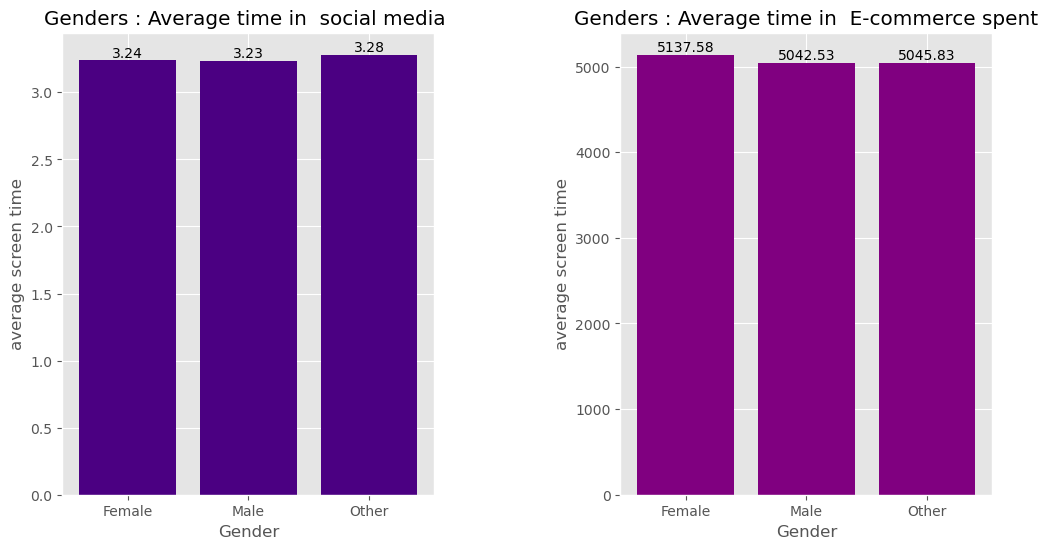

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
bar=plt.bar(scecom['Gender'] , scecom['avg_social_media_time'] , color="indigo")
count = scecom['avg_social_media_time'].round(2)
plt.bar_label(bar , count)
plt.xlabel("Gender")
plt.ylabel("average screen time")
plt.title("Genders : Average time in  social media ")

plt.subplot(1,2,2)
bar=plt.bar(scecom['Gender'] , scecom['average_ecommerce_spend'] , color="purple")
count = scecom['average_ecommerce_spend'].round(2)
plt.bar_label(bar , count)
plt.xlabel("Gender")
plt.ylabel("average screen time")
plt.title("Genders : Average time in  E-commerce spent")
plt.subplots_adjust(wspace=0.5)
plt.show()

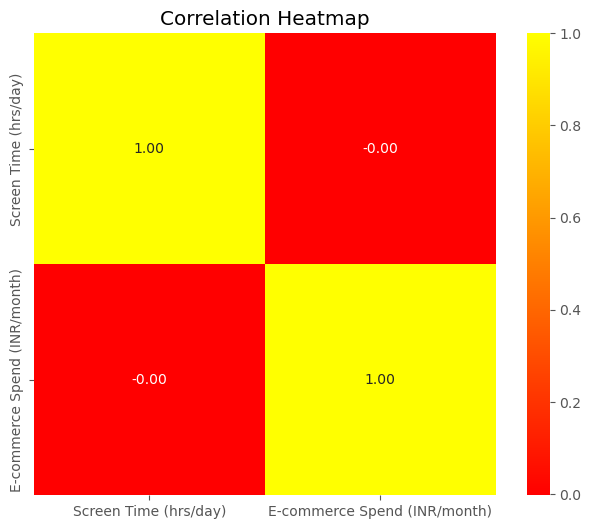

In [93]:
corr = data[['Screen Time (hrs/day)', 'E-commerce Spend (INR/month)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='autumn', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

##  How does social media time impact other activities like streaming or gaming?

In [95]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use', 'AgeGroups'],
      dtype='object')

In [96]:
social_media =data[['Social Media Time (hrs/day)' ,"Streaming Time (hrs/day)" , "Gaming Time (hrs/day)" ]]            

<Axes: xlabel='Social Media Time (hrs/day)', ylabel='Streaming Time (hrs/day)'>

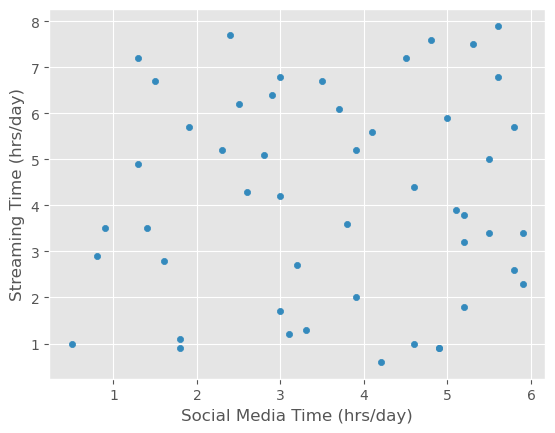

In [97]:
social_media.head(50).plot.scatter(x="Social Media Time (hrs/day)" , y="Streaming Time (hrs/day)")

In [98]:
social_media['Social Media Time (hrs/day)'].corr(social_media['Gaming Time (hrs/day)'])

-0.0065668392234008565

In [99]:
social_media['Social Media Time (hrs/day)'].corr(social_media['Streaming Time (hrs/day)'])


-0.0035705181192828587

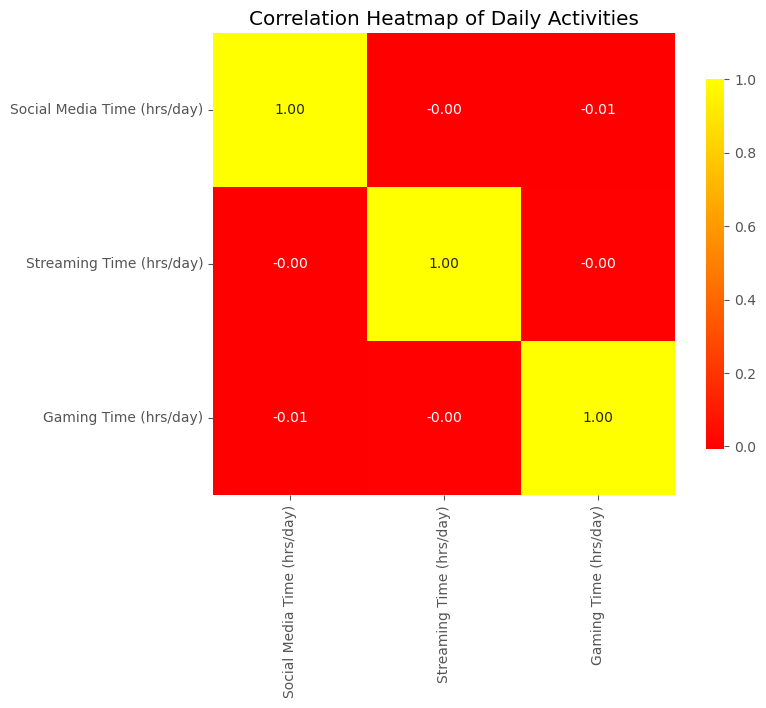

In [100]:
correlation_matrix = social_media.corr()
correlation_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='autumn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Daily Activities')
plt.show()

* there is not a positive relationship between social media , streaming and gaming 
* social media does not affect on streaming and gaming 


# How does streaming time (hrs/day) vary across locations or age groups?


In [103]:
data.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,30-40
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,30-40
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,<18


In [104]:
streaming_cities =data.groupby(["Location"])["Streaming Time (hrs/day)"].mean().reset_index()

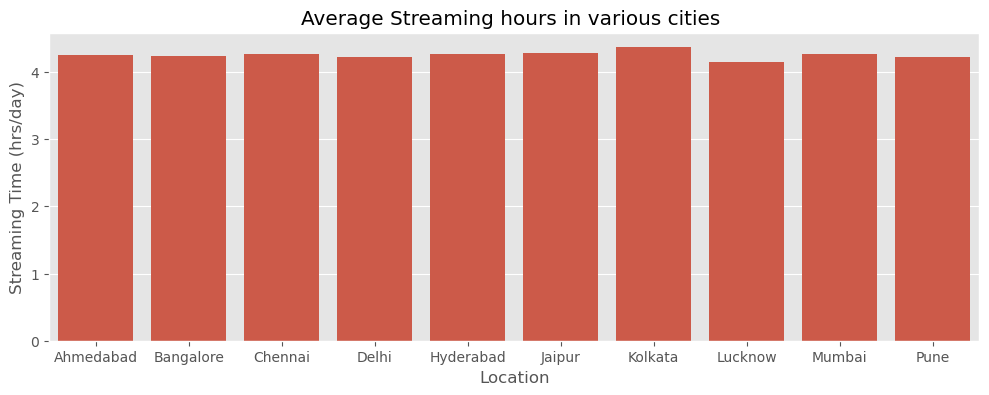

In [105]:
plt.figure(figsize=(12,4))
sns.barplot(data=streaming_cities , x="Location",  y= "Streaming Time (hrs/day)")
plt.title("Average Streaming hours in various cities ")
plt.show()

* the average straming hours of all cities is 4.2 hours 

In [107]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use', 'AgeGroups'],
      dtype='object')

In [108]:
sum_straming_age_group =data.groupby(["AgeGroups"])["Streaming Time (hrs/day)"].sum().reset_index()

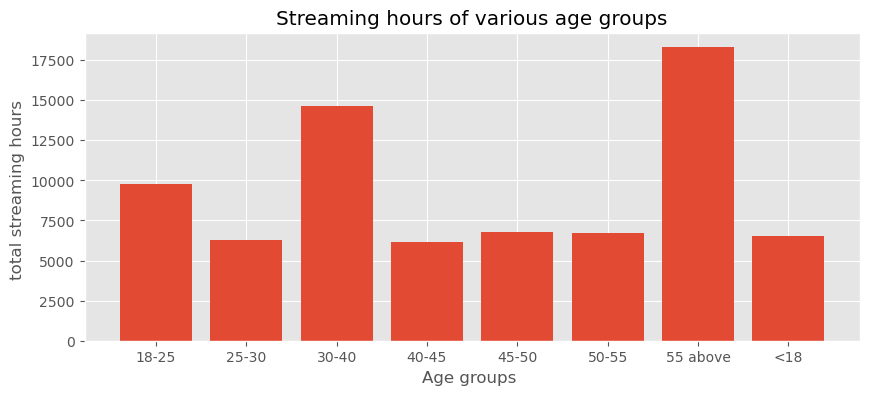

In [109]:
plt.figure(figsize=(10,4))
plt.bar(x=sum_straming_age_group['AgeGroups'] , height=sum_straming_age_group['Streaming Time (hrs/day)'])
plt.xlabel("Age groups ")
plt.ylabel("total streaming hours ")
plt.title("Streaming hours of various age groups")
plt.show()




### Streaming Habits by Age Group

1. **Average Streaming Time**
   - The average streaming time across all age groups is **4.2 hours per day**.

2. **Ranking of Age Groups by Streaming Time**
   - **1st Place:** Age group **55 and above**
   - **2nd Place:** Age group **30-40**
   - **3rd Place:** Age group **18-25**
   - **Least Streaming:** Age group **under 18**

### Insights
- The older age groups tend to stream more compared to younger ones.
- There’s a noticeable drop in streaming time for those under 18, suggesting either less interest or access to streamiata, let me know!

# Financial Behavior

## What is the average e-commerce spend per month, and how does it relate to screen time or social media usage?

In [113]:
data.head(5)

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,AgeGroups
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,50-55
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,55 above
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,30-40
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,30-40
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,<18


In [114]:
average_spend =data['E-commerce Spend (INR/month)'].mean()
print(f"Average e commerce spand is {average_spend} ")


Average e commerce spand is 5075.70784801538 


In [115]:
social_media_ecom=data[['Social Media Time (hrs/day)','E-commerce Spend (INR/month)']]\
            .sort_values(by="Social Media Time (hrs/day)" , ascending=False)

In [116]:
corrleations = social_media_ecom.corr()

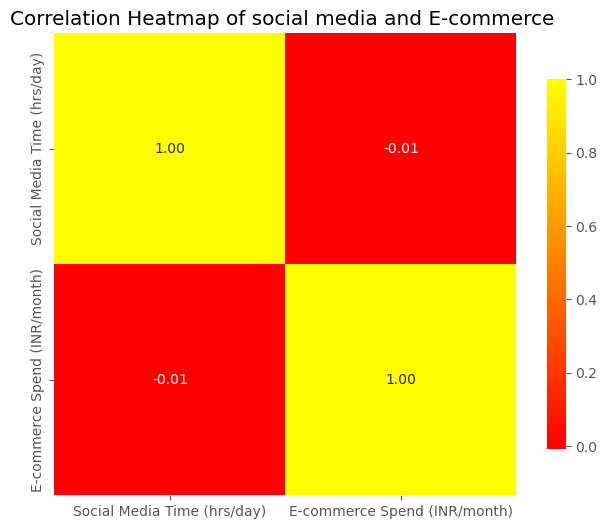

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrleations, annot=True, cmap='autumn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of social media and E-commerce ')
plt.show()

In [118]:
# there is no good positive relations ships between the social media and the E-commerce 

In [119]:
socialmedia_screentiem=data[["Social Media Time (hrs/day)" , "Screen Time (hrs/day)"]]

In [120]:
correlations = socialmedia_screentiem.corr()

In [121]:
correlations

,Social Media Time (hrs/day),Screen Time (hrs/day)
Social Media Time (hrs/day),1.000000,-0.006306
Screen Time (hrs/day),-0.006306,1.000000


<Figure size 1000x400 with 0 Axes>

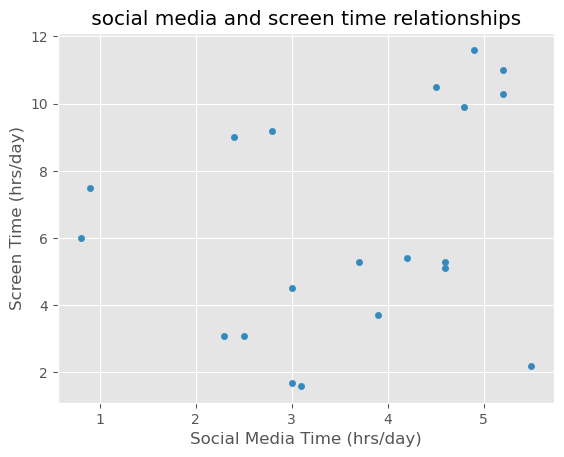

In [122]:
plt.figure(figsize=(10,4))
socialmedia_screentiem.head(20).plot.scatter(x="Social Media Time (hrs/day)" , y="Screen Time (hrs/day)")
plt.title(" social media and screen time relationships ")
plt.show()



- **Sample Size**: 30 samples were analyzed.
- **Relationship Type**: There is a linear relationship.
- **Variables**:
  - **Screen Time**: The amount of time spent on screens.
  - **Social Media Time**: The amount of time spent on social media platforms.
- **Observation**: As screen time increases, social media usage also increases.

# How do monthly recharge costs vary across different demographic segments? 

In [125]:
# average monthly recharge in diffrent demographies 
Monthly_recharge =data.groupby(["Location"])["Monthly Recharge Cost (INR)"].mean().reset_index()\
                    .sort_values(by="Monthly Recharge Cost (INR)" , ascending=True)


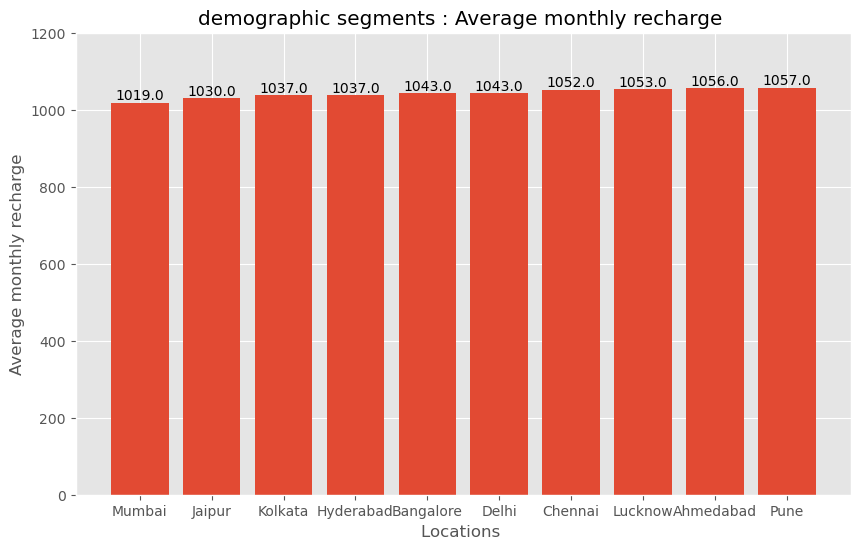

In [126]:
count = Monthly_recharge['Monthly Recharge Cost (INR)'].round(0)
plt.figure(figsize=(10,6))
bar=plt.bar(x=Monthly_recharge['Location'] , height=Monthly_recharge['Monthly Recharge Cost (INR)'])
plt.bar_label(bar , count)
plt.ylim([0,1200])
plt.xlabel("Locations ")
plt.ylabel("Average monthly recharge")
plt.title("demographic segments : Average monthly recharge ")
plt.show()




- **Highest Average Monthly Recharge Plan**: Pune has the highest average monthly recharge plan at **₹1057**.
- **Following Cities**:
  - **Ahmedabad**: Average monthly recharge plan of **₹1056**.
  - **Lucknow**: Average monthly recharge plan of **₹1052**.
- **Tier Comparison**:
  - **Tier 1 Cities**: Have lower average monthly recharge plans compared to Tier 2 cities.
  - **Examples**: Lucknow and Pune (Tier 2 cities) have higher recharge plans than Tier 1 cities.

# Is there a link between e-commerce spend and the primary use of the phone?


In [130]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use', 'AgeGroups'],
      dtype='object')

In [131]:
primaryuse_socialMedia =data.groupby(["Primary Use"])["E-commerce Spend (INR/month)"].mean().reset_index()

In [132]:
primaryuse_socialMedia

,Primary Use,E-commerce Spend (INR/month)
0,Education,5055.279367
1,Entertainment,5155.779194
2,Gaming,5064.814597
3,Social Media,5018.106827
4,Work,5086.349452


In [133]:
primaryuse_socialMedia['values']=[1 , 2 ,3 ,4 ,5]

In [134]:
c=primaryuse_socialMedia['values'].corr(primaryuse_socialMedia['E-commerce Spend (INR/month)'])
print(f"the correlation between primay use and E-commerce spend is {c}")

the correlation between primay use and E-commerce spend is -0.2344648044228525


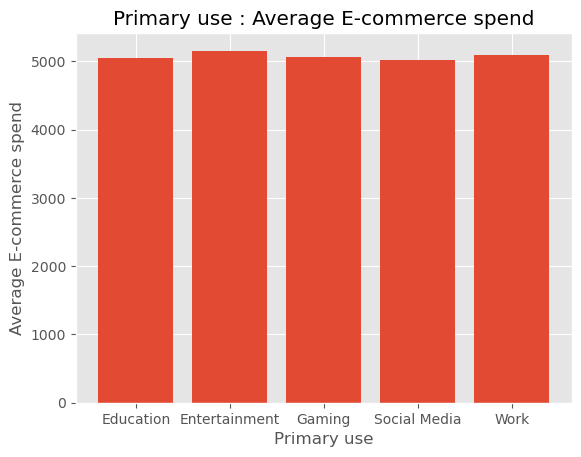

In [135]:
#barplot 
plt.bar(primaryuse_socialMedia['Primary Use'] , primaryuse_socialMedia['E-commerce Spend (INR/month)'])
plt.xlabel("Primary use")
plt.ylabel("Average E-commerce spend")
plt.title("Primary use : Average E-commerce spend")
plt.show()



- E-commerce spending across different primary use categories is above **5000**.
- **Entertainment** has the highest spending at **5155**.
- **Social Media** has the lowest spending at **5018* else!

# Primary Use

## What are the most common primary uses of smartphones, and how do they differ across demographics or regions?

In [139]:
primary_use_counts =data['Primary Use'].value_counts().reset_index()

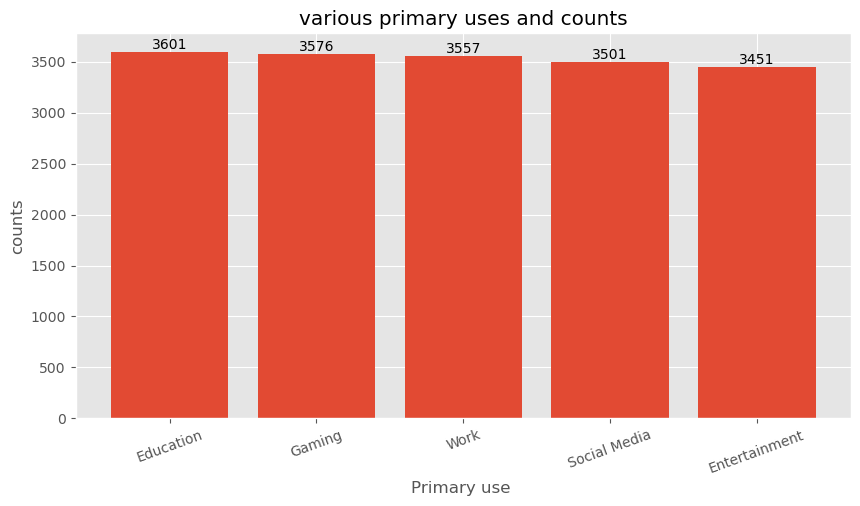

In [140]:
plt.figure(figsize=(10,5))
counts= primary_use_counts['count']
bar=plt.bar(primary_use_counts['Primary Use'] , primary_use_counts['count'])
plt.bar_label(bar , counts)
plt.xlabel("Primary use ")
plt.ylabel("counts")
plt.title("various primary uses and counts")
plt.xticks(rotation=20)

plt.show()


## Insights Summary

### Primary Uses:
1. **Education**: 3601
2. **Gaming**: 3576
3. **Work**: 3557
4. **Entertainment**: 3451

### Observations:
- **Education** is the most utilized primary use case, indicating a strong focus on learning and educational resources.
- **Gaming** follows closely, highlighting the popularity of gaming applications and platforms.
- **Work** is also significant, showing that many users engage with tools for professional purposes.
- **Entertainment**, while still relevant, has the lowest usage among the foureel free to ask!

In [142]:
## 2 based on regions or demographies 


data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use', 'AgeGroups'],
      dtype='object')

In [143]:
locations_primary_use =data[['Location' , "Primary Use"]].value_counts().unstack(fill_value=0)

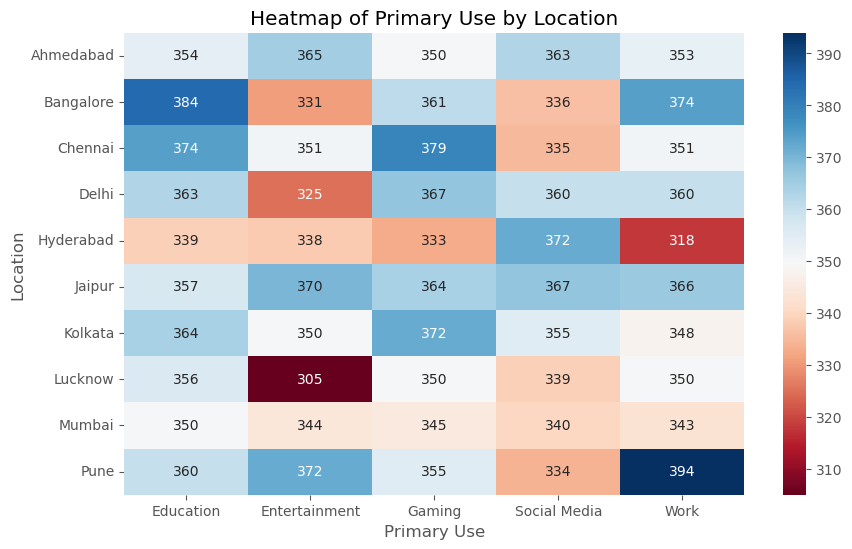

In [144]:
plt.figure(figsize=(10, 6))
sns.heatmap(locations_primary_use, annot=True, fmt='d', cmap='RdBu')
plt.title('Heatmap of Primary Use by Location')
plt.xlabel('Primary Use')
plt.ylabel('Location')
plt.show()

# cities wise insights


## Ahmedabad Insights

- **Most Used Primary Use**: Entertainment and Social Media.
- **Moderate Usage**: Education.
- **Least Used**: Gaming and Work.

### Observations:
- Entertainment and social media dominate the primary use categories, indicating a strong preference for leisure activities.
- Education is utilized at a moderate level, suggesting some interest in learning resources.
- Gaming and work have the least engagement, which may reflect a lesser focus on productivity or profession let me know!



## Bangalore Insights

- **Most Primary Use**: Education, followed by Work.
- **Medium Usage**: Gaming.
- **Least Primary Use**: Entertainment and Social Media.

### Observations:
- Education is the dominant category, indicating a strong emphasis on learning resources.
- Work-related activities are also significant but come second to education.
- Gaming is utilized at a moderate level, suggesting a balanced interest.
- Entertainment and social media have the least engagement, which may indicate a
  preference for more productive or educational activities.




## Chennai Insights

- **Most Primary Use**: Gaming, followed by Education.
- **Moderate Usage**: Social Media.
- **Least Used**: Entertainment and Work (both are the same).

### Observations:
- Gaming is the leading category, indicating a strong interest in gaming activities.
- Education follows, suggesting that there is still a significant focus on learning.
- Social media usage is at a moderate level, reflecting a balanced engagement with online platforms.
- Both entertainment and work have the least engagement, which may indicate a lesser emphree to ask!


## Delhi Insights

- **Most Primary Use**: Gaming, followed by Education.
- **Moderate Usage**: Social Media.
- **Least Used**: Entertainment.

### Observations:
- Gaming is the leading category, indicating a strong interest in gaming activities.
- Education follows, suggesting that there is still a significant focus on learning.
- Social media usage is at a moderate level, reflecting balanced engagement with online platforms.
- Entertainment has the least engagement, which may indicate a lesser emphasis on leisure activities.





## Hyderabad Insights

- **Most Primary Use**: Social Media.
- **Moderate Usage**: Education, Entertainment, and Gaming.
- **Least Used**: Work.

### Observations:
- Social media is the most utilized platform, indicating a high level of engagement.
- Education, entertainment, and gaming have moderate usage, suggesting a balanced interest in these areas.
- Work has the least engagement, which may reflect a lesser focus on professional acther details!



## Jaipur Insights

- **Most Primary Use**: Entertainment, Social Media, and Work.
- **Moderate Usage**: Gaming.
- **Least Used**: Education (which is almost at the same level as gaming).

### Observations:
- Entertainment, social media, and work are the leading categories, indicating a strong engagement in these areas.
- Gaming has a moderate level of usage, suggesting some interest but not as dominant.
- Education is the least utilized, closely trailing gaming, which may point to a lesser emphasis on formal learning ac let me know!



## Kolkata Insights

- **Most Primary Use**: Gaming and Educaage).
- **Moderate Usage**: Social Media and Entertainment.
- **Least Used**: Work.

### Observations:
- Gaming and education are the most utilized categories, indicating a strong interest in both recreational and learning activities.
- Social media and entertainment have moderate engagement, reflecting a balanced interest in these platforms.
- Work has the least usage, suggesting a lower emphasis on professional activities compared to other insights!



## Lucknow Insights

- **Most Primary Use**: Education.
- **Moderate Usage**: Social Media.
- **Equal Usage**: Gaming and Work.
- **Least Used**: Entertainment (the lowest among all cities).

### Observations:
- Education is the most utilized category, highlighting a strong focus on learning.
- Gaming and work have equal levels of engagement, indicating a balanced interest in both areas.
- Social media is used at a moderate level, reflecting a reasonable engagement with online platforms.
- Entertainment has the least usage compared to other cities, suggesting a lower emphasis on leisure st let me know!


## Mumbai Insights

- **Most Primary Use**: Education.
- **Equal Usage**: Gaming, Social Media, Entertainment, and Work (all remaining fields used almost equally).

### Observations:
- Education stands out as the most utilized category, indicating a strong emphasis on learning and academic pursuits.
- The remaining fields—gaming, social media, entertainment, and work—are used almost equally, suggesting a balanced interest across these areas.






## Pune Insights

- **Most Primary Use**: Work (highest usage among all cities).
- **Moderate Usage**: Entertainment, Education, and Gaming.
- **Least Used**: Social Media.

### Observations:
- Work is the most utilized category, indicating a strong professional focus in Pune compared to other cities.
- Entertainment, education, and gaming have moderate levels of engagement, reflecting a balanced interest in these areas.
- Social media usage is the lowest, suggesting a lesser emphasis on online platforms for social int let me know!

# Advanced Correlations


## Is there a relationship between data usage and monthly recharge cost?


In [157]:
data['Data Usage (GB/month)'].corr(data['Monthly Recharge Cost (INR)'])

-0.00891506632462853

In [158]:
monthly_recharge = data[['Data Usage (GB/month)' ,'Monthly Recharge Cost (INR)' ]]

In [159]:
corr =monthly_recharge.corr()

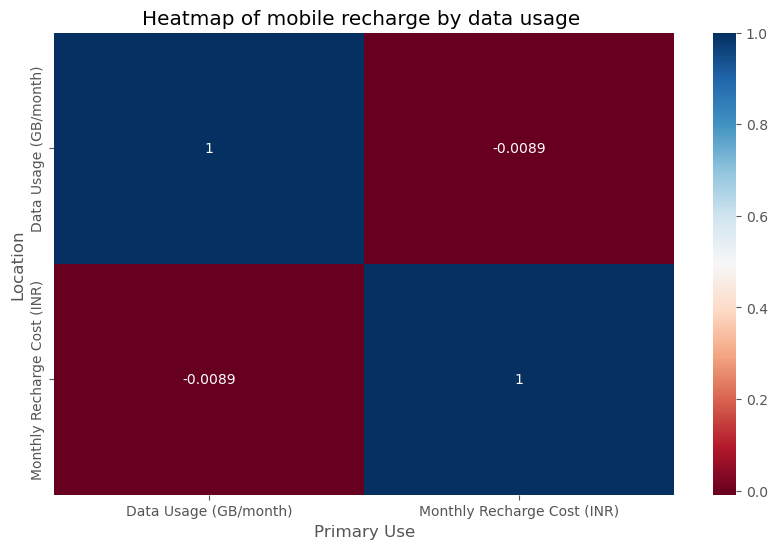

In [160]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True,  cmap='RdBu')
plt.title('Heatmap of mobile recharge by data usage ')
plt.xlabel('Primary Use')
plt.ylabel('Location')
plt.show()

### there is no corelationship between data usage and monthly recharge plan 